### Imports

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Define the problem (find machine [as quickly as possible] which gives highest probability of winning)

In [3]:
prob_of_winning = [0.17, 0.03, 0.15, 0.19, 0.09] # prob of winning for each of 5 machines

N = 10000 # number of trials
d = len(prob_of_winning) # number of machines

simulation_table = np.zeros(shape = (N, d)) # keeps track of wins/loses for each machine

### Perform simulation

In [4]:
for trial in range(N):
  for machine in range(d):
    if np.random.random() < prob_of_winning[machine]:
      simulation_table[trial][machine] = 1

### Determine number of wins/losses for each machine

In [8]:
num_rewards_1 = np.zeros(d)
num_rewards_0 = np.zeros(d)

### Pick the best machine

In [9]:
machine_selected = [] # keeps track of machine selected at each trial
total_reward = 0

for trial in range(N):
  selected = 0
  max_random = 0
  for machine in range(d):
    random_beta = np.random.beta(a = num_rewards_1[machine] + 1, b = num_rewards_0[machine] + 1)
    if random_beta > max_random:
      max_random = random_beta
      selected = machine

  machine_selected.append(selected) # append selected machine to the list of selected machines at each trial

  # check if machine selected at this trail won or lost
  if simulation_table[trial][selected] == 1:
    num_rewards_1[selected] += 1
  else:
    num_rewards_0[selected] += 1

  total_reward += simulation_table[trial][selected] # if machine won, increase total reward by 1

### Visualization

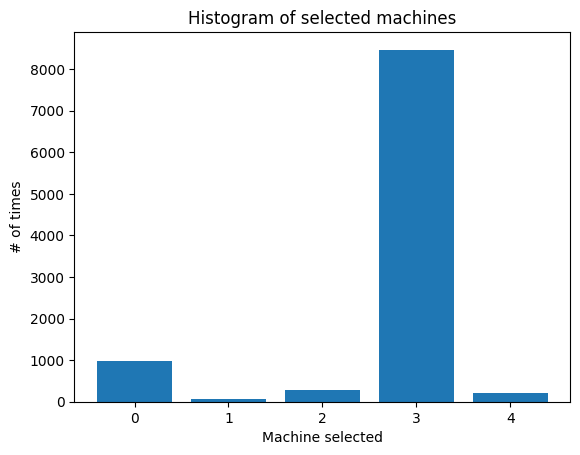

In [21]:
labels, counts = np.unique(machine_selected, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('Histogram of selected machines')
plt.xlabel('Machine selected')
plt.ylabel('# of times')
plt.show()

### Check if fewer number of trials (500 instead of 10000) would be enough to pick best machine

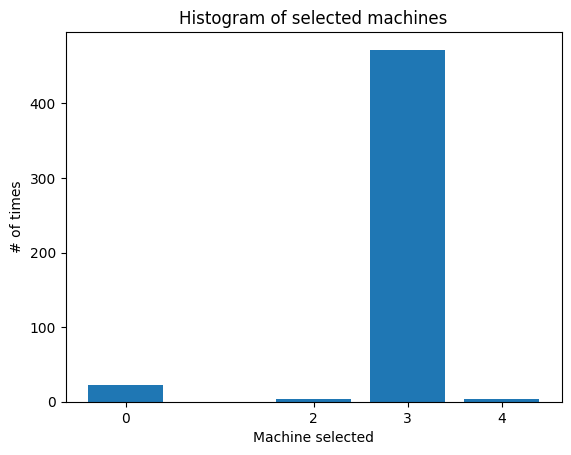

In [22]:
machine_selected = [] # keeps track of machine selected at each trial
total_reward = 0

for trial in range(500):
  selected = 0
  max_random = 0
  for machine in range(d):
    random_beta = np.random.beta(a = num_rewards_1[machine] + 1, b = num_rewards_0[machine] + 1)
    if random_beta > max_random:
      max_random = random_beta
      selected = machine

  machine_selected.append(selected) # append selected machine to the list of selected machines at each trial

  # check if machine selected at this trail won or lost
  if simulation_table[trial][selected] == 1:
    num_rewards_1[selected] += 1
  else:
    num_rewards_0[selected] += 1

  total_reward += simulation_table[trial][selected] # if machine won, increase total reward by 1

labels, counts = np.unique(machine_selected, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('Histogram of selected machines')
plt.xlabel('Machine selected')
plt.ylabel('# of times')
plt.show()